In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100) # The maximum number of columns that can be shown is 50 CHANGED V2

# set seed for reproducibility
np.random.seed(0) 

TODO
☑

- ☐ Remove empty rows
- ☐ Remove irrelevant columns
- ☐ Remove empty columns
- ☐ Fill empty sets of data 

# Data pre-processing

In [8]:
# load dataset and print a sample
nba_data = pd.read_csv("Player Per Game.csv")
nba_data.sample(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
25058,5711,1974,931,Cincinnatus Powell,NaN,PF,31.0,7,ABA,VIR,82,NaN,30.3,6.4,14.2,0.452,0.1,0.4,0.323,6.3,13.9,0.456,0.457,2.5,3.6,0.706,2.1,4.2,6.3,1.7,0.6,0.4,2.3,3.3,15.5
915,29959,2022,4723,Ja Morant,NaN,PG,22.0,3,NBA,MEM,57,57.0,33.1,10.2,20.6,0.493,1.5,4.5,0.344,8.6,16.2,0.534,0.530,5.5,7.3,0.761,1.4,4.4,5.7,6.7,1.2,0.4,3.4,1.5,27.4
26550,4564,1971,1297,John Hummer,NaN,C,22.0,1,NBA,BUF,81,NaN,32.6,4.2,9.4,0.444,NaN,NaN,NaN,4.2,9.4,0.444,0.444,2.9,5.0,0.580,NaN,NaN,8.9,2.0,NaN,NaN,NaN,3.5,11.3
3279,28091,2019,4353,Norman Powell,NaN,SG,25.0,4,NBA,TOR,60,3.0,18.8,3.2,6.7,0.483,1.1,2.8,0.400,2.1,3.8,0.543,0.568,1.0,1.3,0.827,0.3,2.1,2.3,1.5,0.7,0.2,1.1,1.6,8.6
29849,1093,1952,418,Art Burris,NaN,SF,27.0,2,NBA,FTW,29,NaN,8.4,0.6,2.6,0.240,NaN,NaN,NaN,0.6,2.6,0.240,0.240,0.2,0.4,0.583,NaN,NaN,1.7,0.4,NaN,NaN,NaN,1.3,1.5
24072,7201,1977,1021,Phil Jackson,NaN,PF,31.0,9,NBA,NYK,76,NaN,13.6,1.3,3.1,0.440,NaN,NaN,NaN,1.3,3.1,0.440,0.440,0.7,0.9,0.718,1.0,2.0,3.0,1.1,0.4,0.2,NaN,2.4,3.4
1459,28986,2021,4305,Axel Toupane,NaN,SF,28.0,3,NBA,MIL,8,1.0,7.6,0.5,1.4,0.364,0.1,0.3,0.500,0.4,1.1,0.333,0.409,0.6,0.9,0.714,0.0,0.8,0.8,0.5,0.3,0.4,0.0,0.8,1.8
11070,20373,2006,3217,Scott Padgett,NaN,PF,29.0,7,NBA,NJN,62,1.0,11.6,1.1,3.2,0.353,0.7,2.0,0.347,0.5,1.3,0.363,0.458,0.4,0.5,0.794,0.9,1.8,2.7,0.7,0.5,0.2,0.3,1.5,3.4
22060,8795,1982,1353,Dave Robisch,1949.0,C,32.0,11,NBA,DEN,12,0.0,21.4,4.0,8.8,0.453,0.0,0.0,NaN,4.0,8.8,0.453,0.453,4.0,4.6,0.873,1.2,4.1,5.3,2.7,0.3,0.3,1.1,2.4,12.0
28977,1985,1959,610,Bill Russell,NaN,C,24.0,3,NBA,BOS,70,NaN,42.6,6.5,14.2,0.457,NaN,NaN,NaN,6.5,14.2,0.457,0.457,3.7,6.1,0.598,NaN,NaN,23.0,3.2,NaN,NaN,NaN,2.3,16.7


In [11]:
nba_data.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [5]:
nba_data.dtypes # returns the datatype of each column

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [16]:
nba_data.shape # returns the shape of data - 31059 rows, 35 columns

(31059, 35)

In [7]:
nba_data.describe() # view the description of the numerical values in the data set 

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,31059.000000,31059.000000,31059.000000,2868.000000,31037.000000,31059.000000,31059.000000,22422.000000,29976.000000,31059.000000,31059.000000,30909.000000,24707.000000,24707.000000,20569.000000,31059.000000,31059.000000,30830.000000,30909.000000,31059.000000,31059.000000,29810.000000,26402.000000,26402.000000,30165.000000,31059.000000,25433.000000,25434.000000,25424.000000,31059.000000,31059.000000
mean,15530.000000,1994.295084,2598.930101,1944.100418,26.493572,4.953250,48.828745,22.559049,20.230675,3.175002,7.173885,0.429320,0.447691,1.308054,0.258204,2.818355,6.132995,0.449506,0.453859,1.639283,2.211639,0.721071,1.048568,2.531918,3.743574,1.868412,0.665026,0.404573,1.266539,2.007846,8.343301
std,8966.105342,20.148766,1276.364495,15.094113,3.830950,3.712077,26.603588,27.906089,10.267648,2.303008,4.833678,0.101503,0.642431,1.707133,0.173368,2.194045,4.527066,0.109464,0.107360,1.466609,1.869381,0.143496,0.894732,1.865205,2.837662,1.773834,0.481682,0.500001,0.850300,0.919906,6.093119
min,1.000000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7765.500000,1979.000000,1597.000000,1938.000000,24.000000,2.000000,25.000000,0.000000,11.700000,1.400000,3.400000,0.389000,0.000000,0.000000,0.143000,1.100000,2.700000,0.407000,0.413000,0.600000,0.900000,0.658000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000
50%,15530.000000,1997.000000,2688.000000,1946.000000,26.000000,4.000000,54.000000,7.000000,19.500000,2.600000,6.000000,0.437000,0.100000,0.500000,0.302000,2.200000,4.900000,0.459000,0.467000,1.200000,1.700000,0.745000,0.800000,2.100000,3.000000,1.300000,0.600000,0.200000,1.100000,2.000000,6.900000
75%,23294.500000,2011.000000,3637.000000,1951.000000,29.000000,7.000000,74.000000,42.000000,28.700000,4.500000,10.000000,0.480000,0.700000,2.100000,0.366000,4.000000,8.600000,0.500000,0.508000,2.300000,3.000000,0.811000,1.500000,3.400000,5.000000,2.500000,0.900000,0.500000,1.700000,2.700000,11.800000
max,31059.000000,2023.000000,5100.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,39.500000,1.000000,5.300000,13.200000,1.000000,20.000000,39.500000,1.000000,1.500000,11.500000,17.000000,1.000000,7.200000,13.700000,27.200000,14.500000,4.100000,6.000000,5.700000,6.000000,50.400000


In [18]:
nba_data.info() # This pandas function returns the data types associated with each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31059 entries, 0 to 31058
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        31059 non-null  int64  
 1   season         31059 non-null  int64  
 2   player_id      31059 non-null  int64  
 3   player         31059 non-null  object 
 4   birth_year     2868 non-null   float64
 5   pos            31059 non-null  object 
 6   age            31037 non-null  float64
 7   experience     31059 non-null  int64  
 8   lg             31059 non-null  object 
 9   tm             31059 non-null  object 
 10  g              31059 non-null  int64  
 11  gs             22422 non-null  float64
 12  mp_per_game    29976 non-null  float64
 13  fg_per_game    31059 non-null  float64
 14  fga_per_game   31059 non-null  float64
 15  fg_percent     30909 non-null  float64
 16  x3p_per_game   24707 non-null  float64
 17  x3pa_per_game  24707 non-null  float64
 18  x3p_pe

In [27]:
len(nba_data['player_id'].unique())

5100

<Axes: >

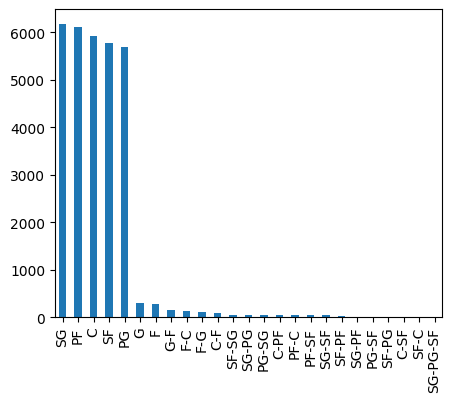

In [31]:
nba_data['pos'].value_counts().plot.bar(figsize=(5, 4)) 

In [162]:
# removing players from seasons prior to 1980 - introduction of 3 point line
nba_data = nba_data.drop(nba_data[nba_data.season < 1980].index)

# removing irrelavant features
nba_data = (nba_data.drop(columns=[
'seas_id','season','gs','player_id','player','birth_year','age',
'experience','lg','tm'
]))

# remove players that played less than 1/4 of all total games
nba_data = nba_data.drop(nba_data[nba_data.g < 30].index)

# remove players that played less than 1/4 of possible game time
nba_data = nba_data.drop(nba_data[nba_data.mp_per_game < 12].index)

print(nba_data.sample(10))

      pos   g  mp_per_game  fg_per_game  fga_per_game  fg_percent  \
11947  PG  55         37.6          6.5          16.6       0.392   
19607   C  80         35.5          7.5          13.1       0.570   
13296   C  79         17.0          1.7           3.8       0.455   
14366  SF  47         22.5          3.8           8.4       0.452   
15279  SF  82         33.0          4.4           9.4       0.471   
6587   SG  64         17.8          2.5           6.1       0.420   
18850  SG  77         33.7          6.1          13.1       0.470   
17775   C  81         37.1          9.6          19.1       0.503   
9306   PG  53         29.7          3.6           9.2       0.387   
11999  SG  78         37.6          7.2          16.5       0.438   

       x3p_per_game  x3pa_per_game  x3p_percent  x2p_per_game  x2pa_per_game  \
11947           2.3            6.1        0.375           4.2           10.6   
19607           0.0            0.0          NaN           7.5           13.1   


In [34]:
# get the number of missing data points per column
nba_data.isnull().sum()

seas_id              0
season               0
player_id            0
player               0
birth_year       28191
pos                  0
age                 22
experience           0
lg                   0
tm                   0
g                    0
gs                8637
mp_per_game       1083
fg_per_game          0
fga_per_game         0
fg_percent         150
x3p_per_game      6352
x3pa_per_game     6352
x3p_percent      10490
x2p_per_game         0
x2pa_per_game        0
x2p_percent        229
e_fg_percent       150
ft_per_game          0
fta_per_game         0
ft_percent        1249
orb_per_game      4657
drb_per_game      4657
trb_per_game       894
ast_per_game         0
stl_per_game      5626
blk_per_game      5625
tov_per_game      5635
pf_per_game          0
pts_per_game         0
dtype: int64

In [147]:
# how many total missing values do we have?
total_cells = np.product(nba_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print((total_missing/total_cells) * 100)

0.3138426518708209


In [148]:
print(nba_data[nba_data['ft_percent'].isna()])


        pos   g  mp_per_game  fg_per_game  fga_per_game  fg_percent  \
7509  PF-SF  30         12.1          0.8           2.2       0.369   

      x3p_per_game  x3pa_per_game  x3p_percent  x2p_per_game  x2pa_per_game  \
7509           0.2            0.7         0.35           0.6            1.5   

      x2p_percent  e_fg_percent  ft_per_game  fta_per_game  ft_percent  \
7509        0.378         0.423          0.0           0.0         NaN   

      orb_per_game  drb_per_game  trb_per_game  ast_per_game  stl_per_game  \
7509           0.4           1.2           1.6           1.2           0.2   

      blk_per_game  tov_per_game  pf_per_game  pts_per_game  
7509           0.0           0.9          1.4           1.8  
